In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

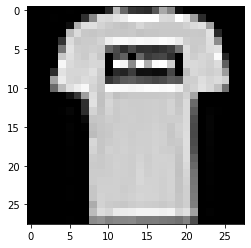

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap='gray')

In [12]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [14]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [15]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.6240 - accuracy: 0.7736
Epoch 2/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.3132 - accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2616 - accuracy: 0.9031
Epoch 4/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2256 - accuracy: 0.9154
Epoch 5/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2016 - accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1772 - accuracy: 0.9333
Epoch 7/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1523 - accuracy: 0.9427
Epoch 8/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1395 - accuracy: 0.9468
Epoch 9/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1203 - accuracy: 0.9557
Epoch 10/10
1875/1875 [==============================] 

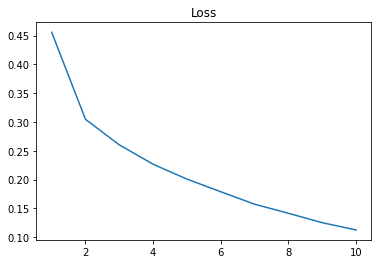

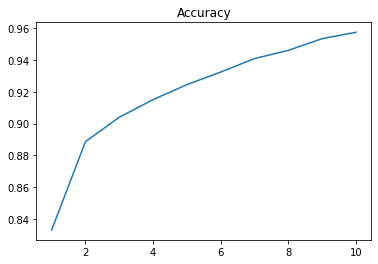

In [58]:
import numpy as np
epochs = np.arange(11)
epochs = epochs[1:]
data = []
for key in history.history.keys() :
    data.append(history.history[key])
plt.title("Loss")
plt.plot(epochs, data[0])
plt.show()
plt.title("Accuracy")
plt.plot(epochs, data[1])
plt.show()

In [59]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3140 - accuracy: 0.9085


[0.31396543979644775, 0.9085000157356262]